# Project: Investigate a Dataset - NoShowAppointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory_Data_Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>You will Find the data used on kaggle [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments).



This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Questions will be discussed :
##### 1.What Gender not Show More ?
##### 2.Which disease are more non showing up ?
##### 3. is there a correlation between Age and scholarship ?
_____________________________________________________________________________

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime
from datetime import timezone
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Loading File to DataFrame
df=pd.read_csv("noshowappointment-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning


In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.rename(columns={'handcap':'handicap','hipertension':'hypertension'},inplace= True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Making columns lowercase for more easy exploring, and fixing types

In [4]:
#Making all columns lower case
df.rename(columns = lambda x : x.lower(),inplace = True)

In [5]:
#Changing wrong column naming to the correct one
df.rename(columns={'handcap':'handicap','hipertension':'hypertension'},inplace= True)

In [6]:
#changing No-Show Column to be understandable and changing Data type for easy Exploring
df.rename(columns = {'no-show':"showed"},inplace = True)
df['showed'] = df['showed'].apply(lambda x: x.lower().replace('no','1'))
df['showed'] = df['showed'].apply(lambda x: x.lower().replace('yes','0'))
df['showed'] = df['showed'].astype(int)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [7]:
#Making data into datetime
df['appointmentday']=pd.to_datetime(df['appointmentday'], format = '%Y-%m-%d %H:%M:%S')
df['scheduledday']=pd.to_datetime(df['scheduledday'], format = '%Y-%m-%d %H:%M:%S')

In [8]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1


<a id='eda'></a>
# Exploring data 

In [9]:
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


From the describe Notice that there is age = -1  Also  Handicap has Max Value 4 which is not correct

In [10]:
#checking Wrong Age index
df.query('age == -1')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [11]:
#Dropping Wrong Ages
df.drop(index=99832,inplace=True)

In [12]:
#checking Hanicap Wrong Values
invalid_HC=df.query('handicap in [2,3,4]').index

In [13]:
#droping HandiCap Wrong Values
df.drop(invalid_HC,inplace = True)

***checking*** The HandiCap Values

In [14]:
#counting handicap Values
df.handicap.value_counts()

0    108285
1      2042
Name: handicap, dtype: int64

In [15]:
#checking for duplicates
df.duplicated().sum()

0

since the result = 0  therefore there is no duplicated records 

Going more specefic and ***checking the ID***

In [16]:
#Checking for Id duplicates
df.patientid.duplicated().sum()

48137

There are 48137 duplicated ID it shows that there are many duplicates for the same ID that means that the patient may have many appointment for the same patient so we have to check patientID with the appoinmentday togethter 

In [17]:
df[['patientid','appointmentday']].duplicated().sum()

8699

In [18]:
#dropping the duplicates for patient appointment
df.drop_duplicates(['patientid','appointmentday'],inplace=True)

In [19]:
#checking the duplicate after dropping
df[['patientid','appointmentday']].duplicated().sum()

0

In [20]:
#dropping the columns wont be used anymore
df.drop(['appointmentid','scheduledday','appointmentday','patientid'],axis=1,inplace=True)

In [21]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
count,101628.000000,101628.000000,101628.000000,101628.000000,101628.000000,101628.000000,101628.000000,101628.000000
mean,37.043581,0.097650,0.197938,0.072332,0.027630,0.018066,0.335616,0.799396
std,23.203174,0.296843,0.398447,0.259039,0.163912,0.133190,0.472208,0.400454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Summary
### What has been Done till now :
1. Corrected Wrong named columns (Handicap , Hypertension , No-Showed)
2. Converting the appointment to time date
3. Droping the wrong age records
4. Droping Handicap Wrong records (2,3,4) as it has only bool Values
5. Droping Duplicates for the Patient Id with the same Appointment
6. Droping Columns which will not be used anymore

In [22]:
#Creating a function to plot a pie chart
def plotpie(df, xvar, labels=["without", "with"]):
    '''
    inputs : df, xvar, labels. xvar is a placeholder and arguments with = are optional
    output: plots a pie cahrt
    '''
    
    #Plot the pie chart
    #Unstack, with subplots=True and autopct(to plot percentage(the .2 is the number of significant decimal places))
    plot = df.groupby(xvar)['showed'].value_counts().unstack().T.plot(kind='pie', subplots=True, figsize=(10,6),
                                                                    explode=[0,0.1], autopct='%1.2f%%');
    
    #set Titles of the pie chart
    plot[0].set_title(f"{labels[0]} {xvar}", fontsize=14, weight='bold')
    plot[1].set_title(f"{labels[1]} {xvar}", fontsize=14, weight='bold')

In [23]:
showed_up = df.showed == True
no_showed = df.showed == False

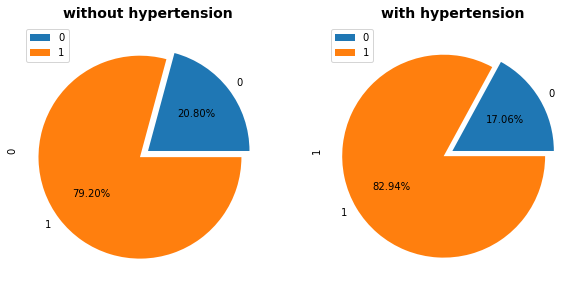

In [24]:
plotpie(df,'hypertension')

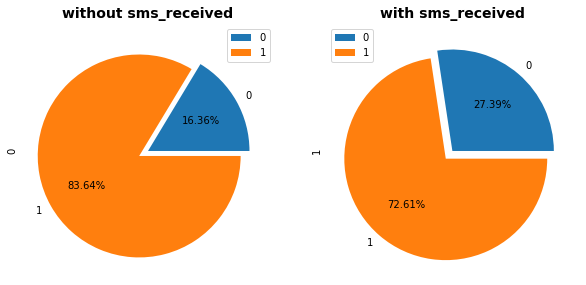

In [25]:
plotpie(df,'sms_received')

## Q1 : What Gender not Show More ?

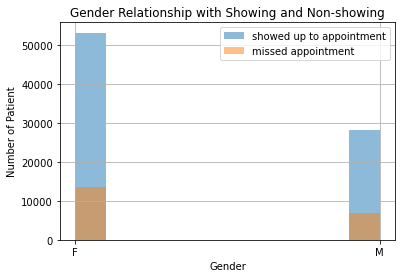

In [26]:
df.gender[showed_up].hist(alpha=0.5, label = 'showed up to appointment')
df.gender[no_showed].hist(alpha=0.5, label = 'missed appointment');
plt.title("Gender Relationship with Showing and Non-showing")
plt.xlabel("Gender")
plt.ylabel("Number of Patient")
plt.legend();

##### The Graph showes that Females Miss the appointment more than Males For the given proportion

## Q2 : Which disease are more non showing up ?

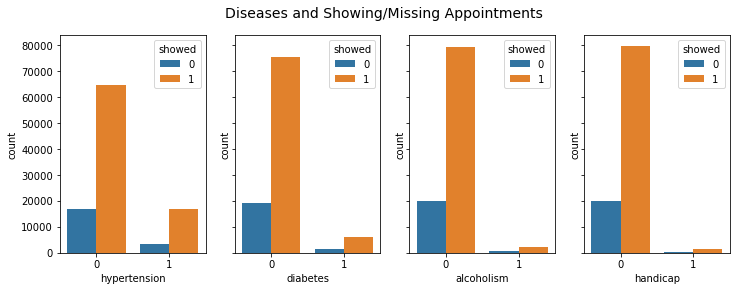

In [27]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(ncols=4, sharey=True)
fig.suptitle("Diseases and Showing/Missing Appointments", fontsize=14)
sns.countplot(x='hypertension', data=df, hue='showed', ax=ax1, palette='tab10');
sns.countplot(x='diabetes', data=df, hue='showed', ax=ax2, palette='tab10');
sns.countplot(x='alcoholism', data=df, hue='showed', ax=ax3, palette='tab10');
sns.countplot(x='handicap', data=df, hue='showed', ax=ax4, palette='tab10');
fig.set_figwidth(12)
fig.set_figheight(4)

The graph Showes that the people with hypertension are the most people who appear not to come Also the diabetes

## Q3 : is there a correlation between Age and scholarship ?

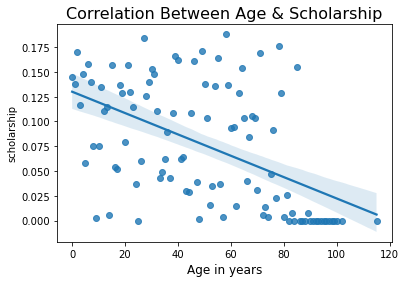

In [28]:
mean_scholarship = df['scholarship'].groupby(df['age']).mean()
age = df['age'].unique()
sns.regplot(x = age , y = mean_scholarship)
plt.xlabel('Age in years',fontsize=12)
plt.title('Correlation Between Age & Scholarship',fontsize=16)
plt.show()

From the above statistics, visualization and the correlation graph as portrayed, we can see that a negative correlation exists. Although our data is still insufficient to demonstrate correlation, it's enough to know that age doesn't have an effect on receiving a scholarship.

<a id='conclusions'></a>
# Conclusion

Due to Data limitation Neighbourhood will be difficult to analysis

no significant differences between the group who suffers from chronic conditions and the group with no chronic condition we can conclude that disease state does not contribute to showing up, however people with chronic illnes showed up more than our chronic diseases-free group

there is no significant in commitment to appointment day in both of our observational groups, however people with disabilities showed higher rate of commitment but not high enough to be significant

women were to attend their appointments more than men


## Limitations
we were able to answer about three questions with the data set, some challenges and limitations were nevertheless encountered during the course of our analysis.

A major limitation of our analysis was insufficient numerical data amongst the column features to enable us make more numerical analysis. This was the initial problem i encountered but along the course of our analysis, we were able to wrangle the data set enough to make the kind of analysis that answered our research questions.

Also, the data cleaning process took a bulk of the time as compared to the exploratory data analysis. I didnt start the project on time and couldnt make out more time as i would have wanted to dive deeper into further answering the questions in the manner i would have wanted.

Also, certain assumptions had to be made for our analysis to proceed as i observed that a lot of patients were of age 0. The data didn't provide any extra information on why a patient would have an age of 0. Therefore, I had to assume that these categories of patients were babies less that 6 months old so that those values could be utilised for our analysis; as the zero aged patients formed a huge percentage of the patient's ages - 3539.

Also,if there were Patient address it would help us for more exploring if they didnt come cause of the long distance 

Lastly, I was also limited by my current knowledge level on python, as i had to read along on more efficient ways to carry out the data wrangling. I still need to garner more indepth knowledge on diverse ways on how to plot visuals using pandas, matplotlib and seaborn. Hopefully my next project would be of much better quality.